In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import scipy
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [11]:
df = pd.read_csv("Customers.csv")
df.set_index(df.CustomerID,inplace=True,drop=True)
df["sp"] = df["Spending Score (1-100)"].apply(lambda x: 1 if x > 50 else 0 )
df.drop(['CustomerID'],axis=1,inplace=True)
df = df.rename({'Annual Income ($)':'income','Work Experience':'workex','Family Size':'famsize','Spending Score (1-100)':'spend'},axis=1)
df

,Gender,Age,income,spend,Profession,workex,famsize,sp
CustomerID,,,,,,,,
1,Male,19,15000,39,Healthcare,1,4,0
2,Male,21,35000,81,Engineer,3,3,1
3,Female,20,86000,6,Engineer,1,1,0
4,Female,23,59000,77,Lawyer,0,2,1
5,Female,31,38000,40,Entertainment,2,6,0
...,...,...,...,...,...,...,...,...
1996,Female,71,184387,40,Artist,8,7,0
1997,Female,91,73158,32,Doctor,7,7,0
1998,Male,87,90961,14,Healthcare,9,2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      2000 non-null   object
 1   Age         2000 non-null   int64 
 2   income      2000 non-null   int64 
 3   spend       2000 non-null   int64 
 4   Profession  1965 non-null   object
 5   workex      2000 non-null   int64 
 6   famsize     2000 non-null   int64 
 7   sp          2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 140.6+ KB


In [13]:
## TASK 1 - BINNING
# Actual age is a continous variable, often expressed in discrete integers. For the purpose of this exercise, we convert age into given bins.

<Axes: xlabel='Age', ylabel='Count'>

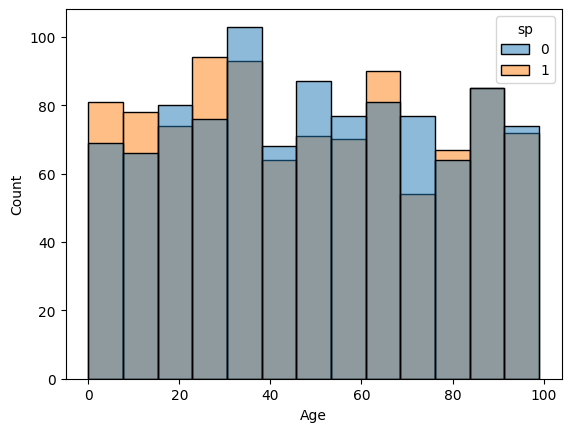

In [14]:
bins = pd.IntervalIndex.from_tuples([(0, 18), (18, 26), (26, 36), (36, 46), (46, 56), (56, 66), (66, 76), (76, 86), (86, 100)])
binned = pd.cut(df.Age,bins=bins,right=False, labels = ["0-18", "18-26", "26-36", "36-46", "46-56", "56-66", "66-76", "76-86", "86-100"])
df['binned_age'] = binned
sns.histplot(x=df.Age,hue=df.sp) #CONTINOUS AGES

<Axes: ylabel='count'>

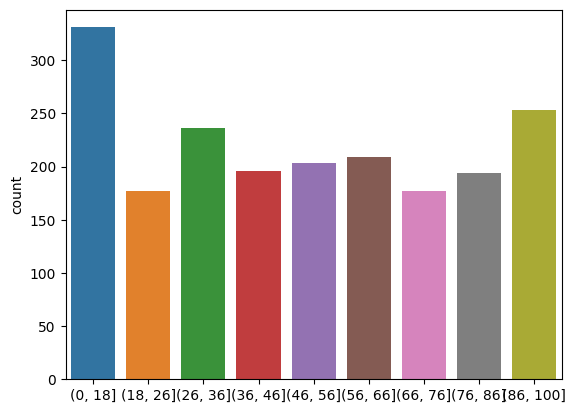

In [15]:
sns.barplot(data=df,x =bins, y=df.binned_age.value_counts(sort=False))

In [16]:
##TASK 2 - HANDLING CATEGORICAL VARIABLES
# We convert the categorical variables into dummies because the categories have to ordering. 

In [17]:
df.Profession.value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [18]:
cat1 = [x for x in df.columns if str(df[x].dtype) == 'object']
cat2 = ['workex', 'famsize']

In [19]:
lb = LabelEncoder()

df['prof'] = lb.fit_transform(df[cat1[1]])
df['gend'] = lb.fit_transform(df[cat1[0]])
cat3 = ['prof','gend']

In [20]:
df_d = pd.get_dummies(df, columns=cat1, dtype='int')

In [21]:
## TEST FOR INDEPENDENCE. 
# Two sample t-test for independence is done for unrelated independent samples drawn from the same population.
# Here we will use the two tail t-test because our assumption is that our mean is the same and we have to prove otherwise. No assumption is made about the direction of difference. 
# i.e. The categorical variable has a significant effect on the means of the independent variable.
# The test suggests if the mean of the two samples are significantly different or not.
# The following assumptions are to be made for the data if un-paired t-test is to be applied:
# 1. Data values are independent and continuous, i.e., the measurement scale for data should follow a continuous pattern.
# 2. Data is normally distributed, i.e., when plotted, its graph resembles a bell-shaped curve.
# 3. Data is randomly sampled.
# 4. Variance of data in both sample groups is similar, i.e., samples have almost equal standard deviation (applicable for a two-sample t-test).

In [22]:
# formula:
# t = [(u1 - u2)]/sqrt(var1/n1 + var2/n2)
# alpha = 0.05 (setting our tolerance threshold to 5%)

In [47]:
## T-TEST
#H0: The sample means are the same
#H1: The sample means are different

In [48]:
# t-test for Income

In [49]:
d1 = df[df['sp'] == 1]['income']
d2 = df[df['sp'] == 0]['income']

u1 = d1.mean()
u2 = d2.mean()
std1 = d1.std()
std2 = d2.std()

count1 = len(d1)
count2 = len(d2)

t = ((u1) - (u2))/np.sqrt(std1**2/count1 + std2**2/count2)
t, std1, std2

(0.9340827858865405, 45419.69121730768, 46055.63688525908)

In [50]:
# t-test table value
deg = count1 + count2 -2
alpha = 0.05
cv = scipy.stats.t.ppf(1.0 - alpha, deg)
p = (1.0 - scipy.stats.t.cdf(abs(t), deg)) * 2.0
cv, p

(1.6456166300576656, 0.3503740610103603)

In [51]:
#verifying the result with scipy
scipy.stats.ttest_ind(d1, d2, axis=0, equal_var=True)

TtestResult(statistic=0.933991835489728, pvalue=0.3504209630832471, df=1998.0)

In [52]:
# t - test for Age

In [53]:
d1 = df[df['sp'] == 1]['Age']
d2 = df[df['sp'] == 0]['Age']

u1 = d1.mean()
u2 = d2.mean()
std1 = d1.std()
std2 = d2.std()

count1 = len(d1)
count2 = len(d2)

t = ((u1) - (u2))/np.sqrt(std1**2/count1 + std2**2/count2)
t, std1, std2

(-1.3060835737388348, 28.81262051878883, 28.036972152619438)

In [54]:
deg = count1 + count2 -2
alpha = 0.05
cv = scipy.stats.t.ppf(1.0 - alpha, deg)
p = (1.0 - scipy.stats.t.cdf(abs(t), deg)) * 2.0
cv, p

(1.6456166300576656, 0.1916744807572075)

In [55]:
# since p value is greater than 0.05, we fail to reject the null that both the means are different, and hence conclude that 'sp'
# does not have any significant effect on either income or age. 

In [56]:
# CHI-SQUARE TEST FOR INDEPENDENCE BETWEEN CATEGORICAL VARIABLES

In [57]:
# Manual method

In [30]:
# SUM((O - E)**2/E) ~ chi2 distributed

In [59]:
# Chi2 between Gender and Profession

In [86]:
chi2 = pd.crosstab(df.Gender,df.Profession, margins=True)
chi2.index = ["Female", "Male", "COL"]
chi2

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,All
Female,380,89,103,133,87,196,39,86,53,1166
Male,232,72,76,101,66,143,21,56,32,799
COL,612,161,179,234,153,339,60,142,85,1965


In [87]:
observed = chi2.iloc[0:2,0:9]
expected = np.outer(chi2["All"][0:2], chi2.loc["COL"][0:9]) / 1965
expected = pd.DataFrame(expected)
expected.index = chi2.index.to_list()[0:2]
expected.columns = chi2.columns.to_list()[0:9]
expected

,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Female,363.151145,95.53486,106.215776,138.851908,90.787786,201.157252,35.603053,84.26056,50.437659
Male,248.848855,65.46514,72.784224,95.148092,62.212214,137.842748,24.396947,57.73944,34.562341


In [88]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

5.78717749228446


In [89]:
deg = (len(expected.index)-1)*(len(expected.columns)-1)
critical_value= scipy.stats.chi2.ppf(q = 0.95, df = deg)

print("Critical value:",critical_value)

p_value = 1 - scipy.stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value:",p_value)

Critical value: 15.50731305586545
P value: 0.6710571979894521


In [81]:
# chi2 between famsize and workex

In [82]:
pd.crosstab(df.famsize,df.workex,margins=True)

workex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,All
famsize,,,,,,,,,,,,,,,,,,,
1,61,77,10,7,19,17,15,11,34,20,13,1,2,4,2,4,2,0,299
2,82,97,13,4,18,20,21,25,28,25,17,1,2,2,2,3,1,0,361
3,65,71,12,15,14,16,23,20,19,30,8,2,2,3,7,3,1,0,311
4,61,54,7,14,21,19,20,19,29,20,15,4,1,3,0,0,1,1,289
5,58,52,7,7,22,20,11,14,20,20,12,2,6,2,2,1,0,2,258
6,52,59,9,5,16,11,18,19,16,20,9,2,1,2,2,0,0,2,243
7,51,59,5,3,11,14,11,18,19,24,10,2,3,0,1,3,0,0,234
8,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,4
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [98]:
chi2 = pd.crosstab(df.famsize,df.workex, margins=True)
observed = chi2.iloc[0:17,0:8]
expected = np.outer(chi2["All"][0:17], chi2.loc["All"][0:8]) / 1965
expected = pd.DataFrame(expected)
expected.index = chi2.index.to_list()[0:17]
expected.columns = chi2.columns.to_list()[0:8]
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)
deg = (len(expected.index)-1)*(len(expected.columns)-1)
critical_value= scipy.stats.chi2.ppf(q = 0.95, df = deg)
print("Critical value:",critical_value)
p_value = 1 - scipy.stats.chi2.cdf(x=chi_squared_stat, df=8)
print("P value:",p_value)

52.151931003058536
Critical value: 82.5287265414718
P value: 1.5731489111381336e-08


In [99]:
# No relation between categorical variable family size and work experience.

In [33]:
# Sklearn method

<Axes: >

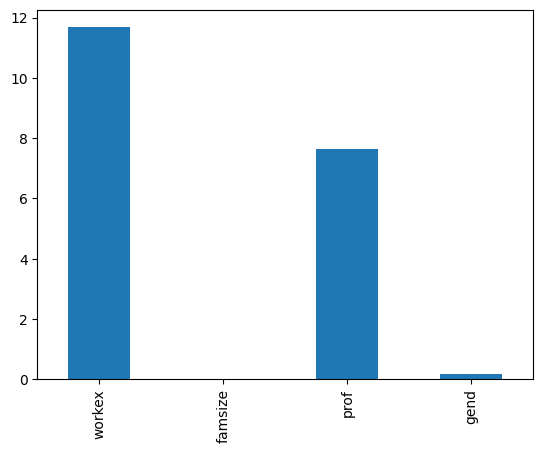

In [34]:
c = cat2+cat3

X = df[c]
y = df.sp

chi_vals = chi2(X, y)
chi = pd.Series(chi_vals[0],index=c)
p = pd.Series(chi_vals[1],index=c)


chi.plot(kind='bar')

In [35]:
# We see that work experience and profession play a significant role in deciding the movement of spending score. 
# We, thus keep these two and eliminate the rest out of the table. 


In [36]:
# COVARIANCE MATRIX
# Covariance measures the degree to which two variables change together. 
# In other words, it quantifies the extent to which changes in one variable correspond to changes in another variable.  
# formula - SUM[(x-X)(y-Y)]/df
# The range for covariance ranges from -inf to +inf.
# If we divide the covariance with respective variances, we get the correlation coefficient.
# A positive covariance indicates that as one variable increases, the other tends to increase as well. 
# A negative covariance indicates that as one variable increases, the other tends to decrease. 
# A covariance of zero suggests that there is no linear relationship between the variables.


In [117]:
df[num] = (df[num] - df[num].mean())/df[num].std()

<Axes: >

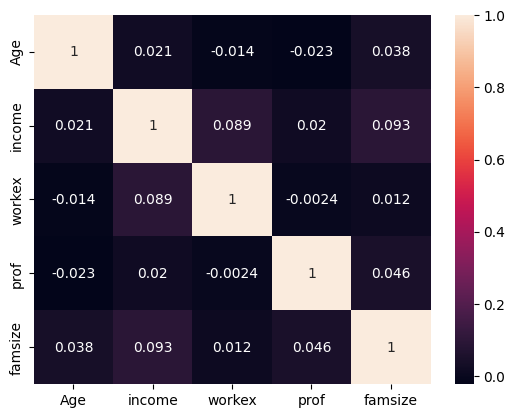

In [130]:
sns.heatmap(df[num].cov(ddof=4),annot=True,)

In [123]:
df

,Gender,Age,income,spend,Profession,workex,famsize,sp,binned_age,prof,gend
CustomerID,,,,,,,,,,,
1,Male,-1.053826,-2.092978,39,Healthcare,-0.791009,0.117468,0,"(18, 26]",0.778161,1
2,Male,-0.983477,-1.655719,81,Engineer,-0.281092,-0.389953,1,"(18, 26]",-0.354259,1
3,Female,-1.018651,-0.540710,6,Engineer,-0.791009,-1.404796,0,"(18, 26]",-0.354259,0
4,Female,-0.913128,-1.131009,77,Lawyer,-1.045968,-0.897375,1,"(18, 26]",1.533108,0
5,Female,-0.631733,-1.590130,40,Entertainment,-0.536051,1.132311,0,"(26, 36]",0.023215,0
...,...,...,...,...,...,...,...,...,...,...,...
1996,Female,0.775244,1.610318,40,Artist,0.993701,1.639732,0,"(66, 76]",-1.109205,0
1997,Female,1.478733,-0.821474,32,Doctor,0.738743,1.639732,0,"(86, 100]",-0.731732,0
1998,Male,1.338035,-0.432248,14,Healthcare,1.248660,-0.897375,0,"(86, 100]",0.778161,1


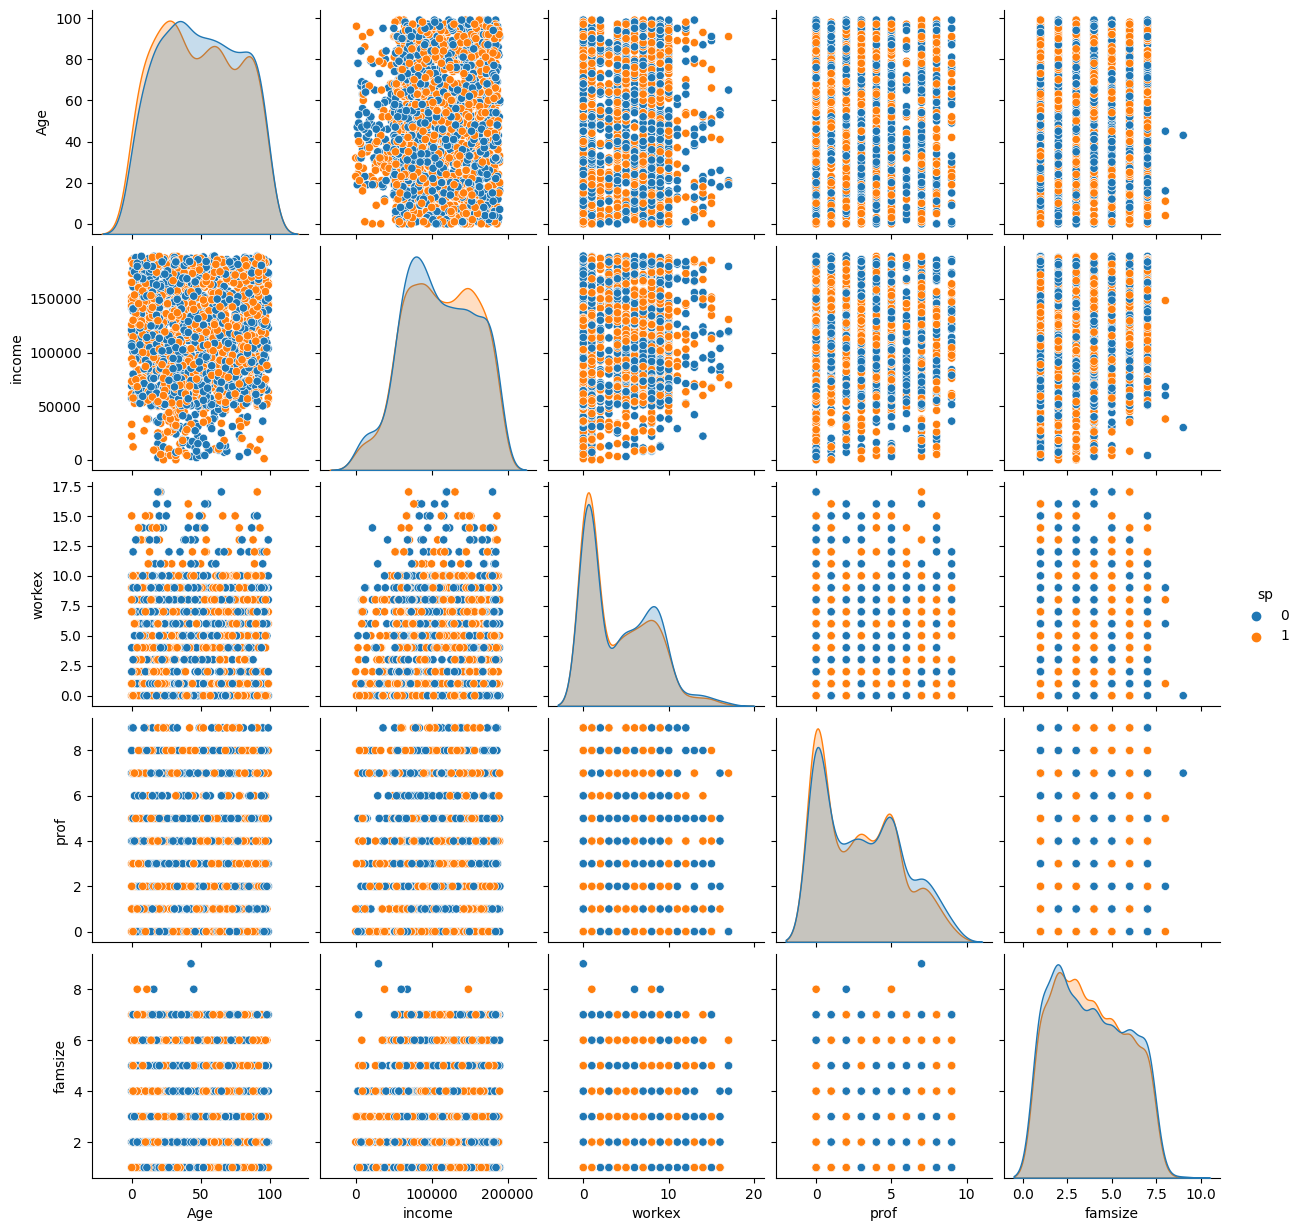

In [111]:
sns.pairplot(data=df, vars= num, hue='sp')

In [131]:
# BOX-PLOTTING

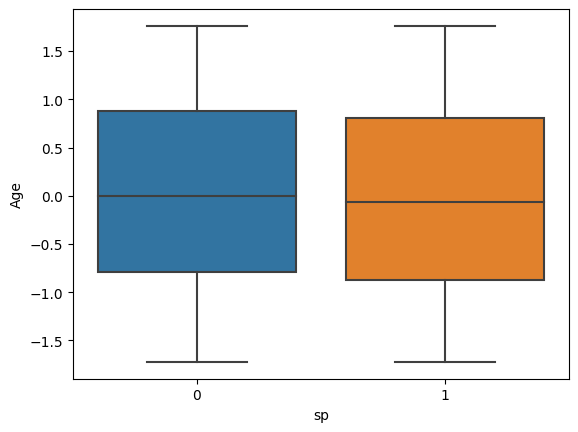

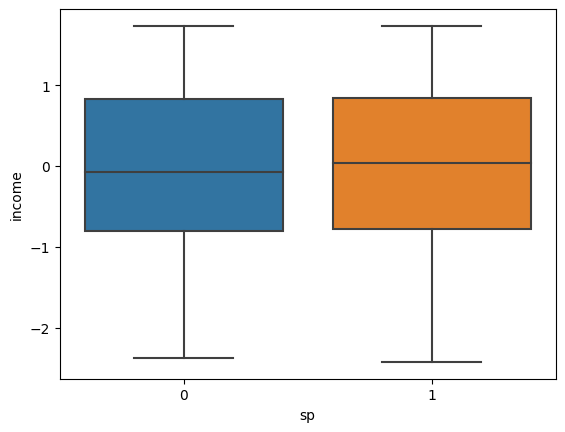

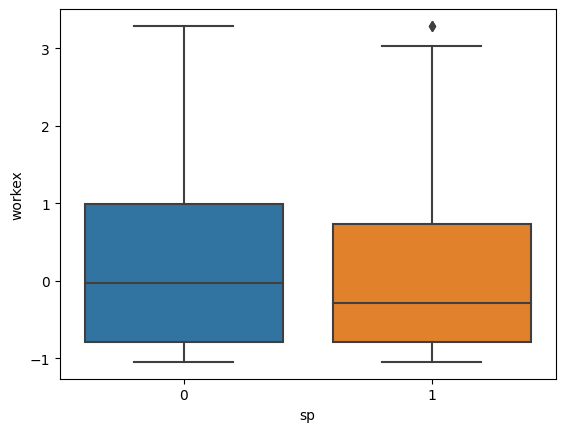

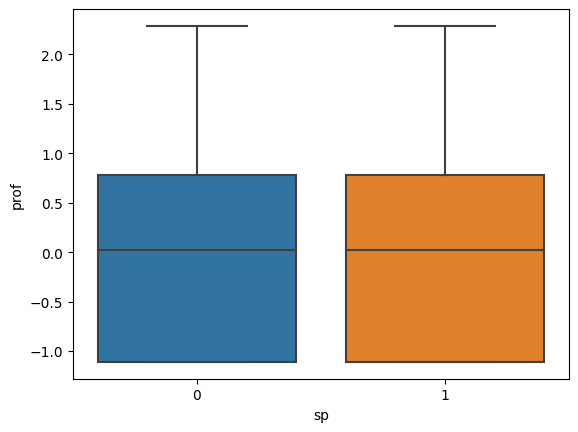

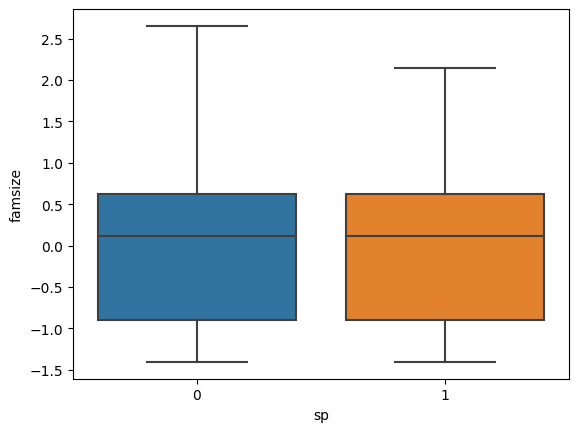

In [137]:
for i in num:
    sns.boxplot(x=df.sp,y=df[i])
    plt.show()